<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/CNN_Padding_%26_Strides_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Padding-**

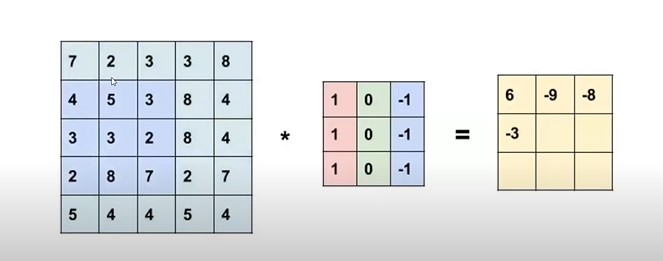

Let we have an image of size 5 * 5 and filter is of 3 * 3 then the feature map that we got after convolution process is of 3 * 3 size.If we again apply convolution process on this feature map with 3 * 3 filter , then we will get only 1 * 1 feature map.This reduction of size of feature map means that we are losing the information which is not at all desired for the better CNN model.

Think once while convolution process,the corner pixels are involved in convolution process less number of times than the center pixels.Which means we are giving more importance to the center pixels and less importance to the corner pixels.If more cruitoial information is there in corner pixels then our model wont be able to extract it perfectly.

To solve these two problems we have Concept of **Padding**.

We add one row above and one row below with one row left and one row at right.The pixel values in this added rows and pixels are 0 so we cll it as zero padding.

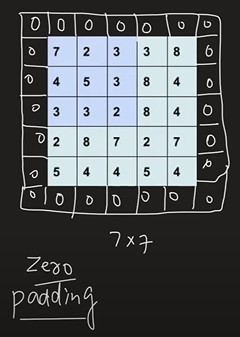

Now as we have applied zero padding to the 5 * 5 image, the size of image has became 7 * 7 and we will perform convolution operation on this image with 3 * 3 filter. We will get the 5 * 5 feature map as output and as a result we avoided the loss of information by keeping the same size of output feature map as the image size.

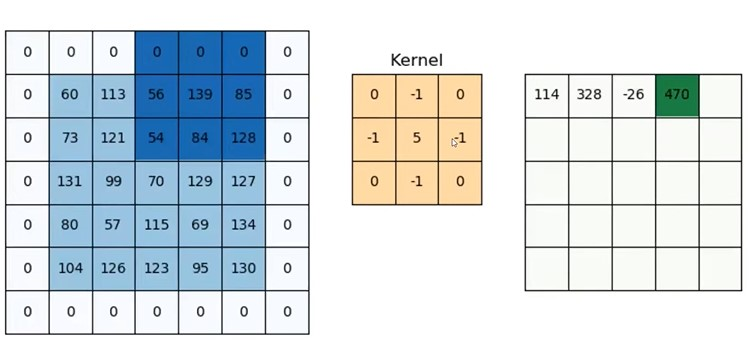

We have two types of padding in keras library.One type is valid, which means convolution process will be applied as it is without adding any kind of padding in it. Second type is 'same',in which keras will automatically figure out how much padding is required for the given image so that feature map and input image size remains same.

**Keras Implementation of Padding**

In [3]:
#Importing dependencie
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten
from keras import Sequential
from keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
#Defining the model
model = Sequential()
#Here obseve we have added conv2d layer with 3 * 3 filter.
#padding is 'valid' means there wont be any padding added to the input image
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation = 'relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation = 'relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation = 'relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

#Here obseve that the input to the next layer is decreasing by 2 pixels.
#It was 28 initially , it is 26 for 1st conv2d layer
#It is 24 and 22 for subsequent layer in CNN architecture as input.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 22, 22, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,982,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,002,698 (7.64 MB)

 Trainable params: 2,002,698 (7.64 MB)

 Non-trainable params: 0 (0.00 B)

Now we will define another model with padding as 'same' and observe the results.


In [7]:
#Defining the model
model2 = Sequential()
#Here obseve we have added conv2d layer with 3 * 3 filter.
#padding is 'smae' means there will be padding added to the input image in order to keep input image size.
model2.add(Conv2D(32,kernel_size=(3,3),padding='same',activation = 'relu',input_shape=(28,28,1)))
model2.add(Conv2D(32,kernel_size=(3,3),padding='same',activation = 'relu'))
model2.add(Conv2D(32,kernel_size=(3,3),padding='same',activation = 'relu'))
model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,231,498 (12.33 MB)

 Trainable params: 3,231,498 (12.33 MB)

 Non-trainable params: 0 (0.00 B)

Here obseve that the input to the next layer is not decreasing by 2 pixels.It is keeping the same size after convolution process as input image size throughout the network.

**Strides-**

We have 7 * 7 image and 3 * 3 filter.While performing the convolution process , we shift the kernel by one pixel to calclate the sum of multiplication of each pixel values.This shift towards right by one pixel is known as stride = 1. After horizontal calculation, we shift the kernel by one pixel towards down. So this kind of shifting is known as (1*1) stride.

If we want we can change the stride to (2  * 2). This 2 * 2 stride wil work the same just your jump towards right will be 2 pixels and jump towards down will be by 2 pixels.

If we increase the number of strides then the feature map size will decrease. By increasing the stride size , we are noting but the ignoring features of that perticular pixel or in a way we are losing the information.If we use strides and perform convolution operation, then it is known as strided convolution.

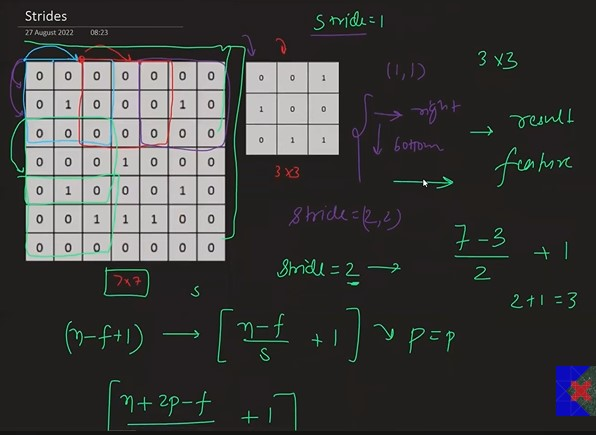

**Why Strides Are Required?**

1) I have a requirement of only extracting high level features.

2) We will be having large dataset so trining might take more time. To decrease the training time we use strides.

**Now we will implement strides in a model**

In [12]:
model3 = Sequential()
#Here observe that we have defined strides of (2,1) which means 2 pixel shift in horizontal and 1 pixel shift in vertical
model3.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2),activation='relu',input_shape=(28,28,1)))
model3.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2),activation='relu'))
model3.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2),activation='relu'))
model3.add(Flatten())
model3.add(Dense(128,activation='relu'))
model3.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model3.summary()
#Our image was 28 * 28
#After 1st conv2d layer image reduced to 14 * 14
#After 2nd conv2d layer image reduced to 7 * 7
#This reduction in size of image is nothing but the lossing of information.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,770 (335.04 KB)

 Trainable params: 85,770 (335.04 KB)

 Non-trainable params: 0 (0.00 B)